# Exploratory Data Analysis

## _1. Set Up EDA Environment_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Plotting setup
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set up figure parameters for consistency
FIGSIZE = (12, 8)
SMALL_FIGSIZE = (10, 6)
COLOR_PALETTE = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#5E4B99', '#7FB069']

print("EXPLORATORY DATA ANALYSIS")
print("=" * 60)
print("Objective: Uncover actionable business insights from e-commerce data")
print("=" * 60)

EXPLORATORY DATA ANALYSIS
Objective: Uncover actionable business insights from e-commerce data


## _2. Load Data_

In [2]:
# Load processed data
PROCESSED_DATA_PATH = '../data/processed/'

try:
    master_df = pd.read_csv(f"{PROCESSED_DATA_PATH}master_dataset.csv",
                            parse_dates = ['order_purchase_timestamp', 
                                      'order_approved_at',
                                      'order_delivered_carrier_date',
                                      'order_estimated_delivery_date',
                                      'order_delivered_customer_date'])
    # Force datetime conversion with error handling
    for col in ['order_delivered_carrier_date', 'order_delivered_customer_date']:
        master_df[col] = pd.to_datetime(master_df[col], errors='coerce')

    print(f"✅ Master dataset loaded: {master_df.shape[0]:,} orders")
    
    # Load supporting datasets for detailed analysis
    order_items = pd.read_csv(f'{PROCESSED_DATA_PATH}order_items_clean.csv')
    print(f"✅ Order items loaded: {order_items.shape[0]:,} items")
    
except Exception as e:
    print(f"Error loading data: {e}")

✅ Master dataset loaded: 99,281 orders
✅ Order items loaded: 112,650 items


In [3]:
master_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,price_sum,price_count,price_mean,freight_value_sum,product_id_nunique,review_score,payment_value,payment_installments
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,29.990,1.000,29.990,8.720,1.000,4.000,38.710,1.000
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,118.700,1.000,118.700,22.760,1.000,4.000,141.460,1.000
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,159.900,1.000,159.900,19.220,1.000,5.000,179.120,3.000
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,45.000,1.000,45.000,27.200,1.000,5.000,72.200,1.000
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,19.900,1.000,19.900,8.720,1.000,5.000,28.620,1.000


In [4]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.900,19.930
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000,17.870
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.990,12.790
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.900,18.140


In [5]:
# Define business metrics upfront
print("\nKEY BUSINESS METRICS OVERVIEW")
print("=" * 40)

metrics = {
    'Total Orders': f"{master_df.shape[0]:,}",
    'Total Revenue': f"${master_df['payment_value'].sum():,.2f}",
    'Average Order Value': f"${master_df['payment_value'].mean():.2f}",
    'Date Range': f"{master_df['order_purchase_timestamp'].min().strftime('%Y-%m-%d')} to {master_df['order_purchase_timestamp'].max().strftime('%Y-%m-%d')}",
    'Unique Customers': f"{master_df['customer_id'].nunique():,}",
    'Average Review Score': f"{master_df['review_score'].mean():.2f}/5.0"
}

for metric, value in metrics.items():
    print(f"{metric}: {value}")


KEY BUSINESS METRICS OVERVIEW
Total Orders: 99,281
Total Revenue: $15,971,742.35
Average Order Value: $160.88
Date Range: 2016-09-04 to 2018-09-03
Unique Customers: 99,281
Average Review Score: 4.09/5.0


## _3. Executive Summary_

In [6]:
def executive_summary(df):
    """
    Generate executive level summary with key insights
    """
    print("EXECUTIVE SUMMARY")
    print("=" * 50)

    # Revenue analysis
    total_revenue = df['payment_value'].sum()
    avg_order_value = df['payment_value'].mean()
    median_order_value = df['payment_value'].median()

    # Customer analysis  
    unique_customers = df['customer_id'].nunique()
    total_orders = len(df)
    orders_per_customer = total_orders / unique_customers

    # Geographic insights
    top_states = df['customer_state'].value_counts().head(5)
    
    # Satisfaction metrics
    avg_rating = df['review_score'].mean()
    satisfaction_rate = (df['review_score'] >= 4).mean() * 100

    # Time analysis
    df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
    monthly_growth = df.groupby('order_month')['payment_value'].sum().pct_change().mean() * 100

    summary = {
        'revenue_metrics': {
            'total_revenue': total_revenue,
            'avg_order_value': avg_order_value,
            'median_order_value': median_order_value
        },
        'customer_metrics': {
            'unique_customers': unique_customers,
            'repeat_rate': (orders_per_customer - 1) * 100,
            'orders_per_customer': orders_per_customer
        },
        'satisfaction_metrics': {
            'avg_rating': avg_rating,
            'satisfaction_rate': satisfaction_rate
        },
        'growth_metrics': {
            'monthly_growth_rate': monthly_growth
        },
        'geographic_insights': {
            'top_state': top_states.index[0],
            'top_state_share': (top_states.iloc[0] / total_orders) * 100
        }
    }

    # Present insights professionally
    print(f"Revenue: ${total_revenue:,.0f} across {total_orders:,} orders")
    print(f"Customer Base: {unique_customers:,} customers ({orders_per_customer:.1f} orders/customer)")
    print(f"Satisfaction: {avg_rating:.2f}/5.0 ({satisfaction_rate:.1f}% satisfied)")
    print(f"Geographic Concentration: {top_states.index[0]} leads with {(top_states.iloc[0]/total_orders)*100:.1f}% of orders")
    print(f"Growth Trend: {monthly_growth:.1f}% average monthly growth")
    
    return summary

In [7]:
executive_summary = executive_summary(master_df)

EXECUTIVE SUMMARY
Revenue: $15,971,742 across 99,281 orders
Customer Base: 99,281 customers (1.0 orders/customer)
Satisfaction: 4.09/5.0 (76.5% satisfied)
Geographic Concentration: SP leads with 42.0% of orders
Growth Trend: 31635.0% average monthly growth


## _4. Advanced Revenue Analysis_


REVENUE PATTERN ANALYSIS


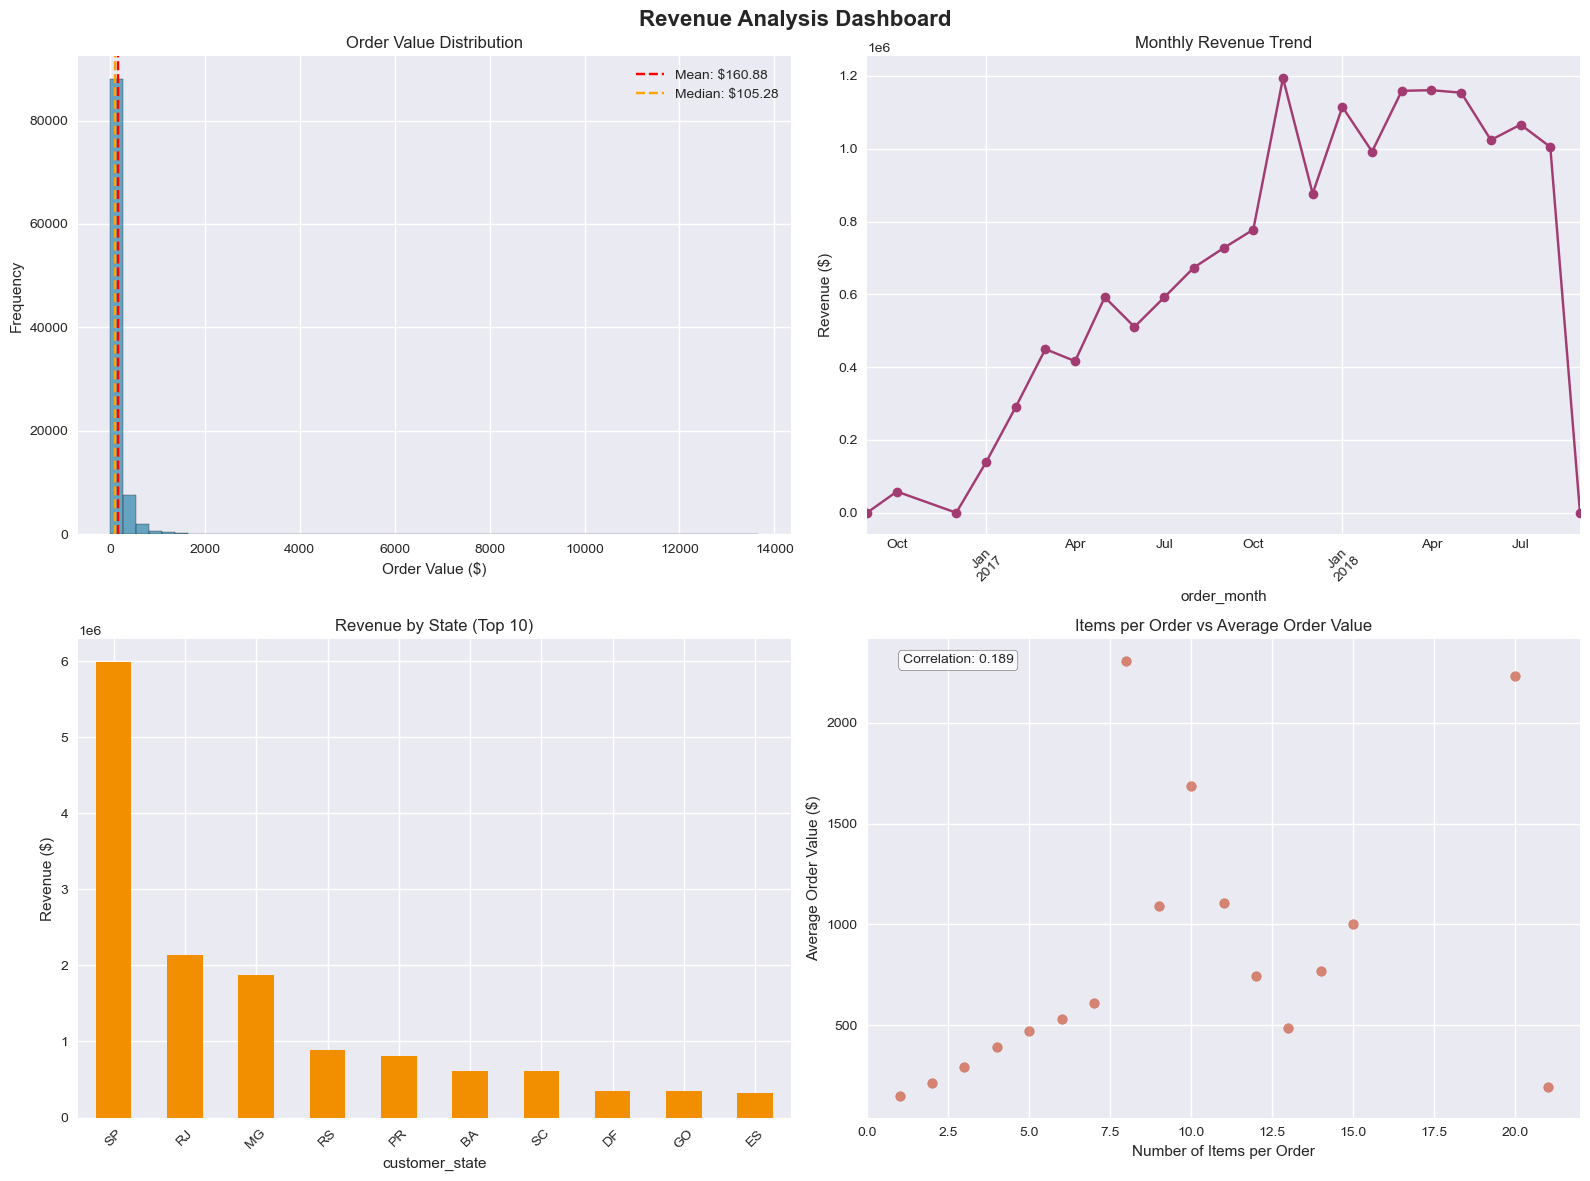


KEY REVENUE INSIGHTS:
- Order value is right-skewed (mean $160.88 > median $105.28)
- Top state (SP) contributes $5,984,344 (37.5% of total revenue)
- Items per order correlation with value: 0.189 (weak)


In [8]:
def analyze_revenue_patterns(df):
    """
    Comprehensive revenue analysis with business insights
    """
    print("\nREVENUE PATTERN ANALYSIS")
    print("=" * 150)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Revenue Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Revenue distribution
    axes[0,0].hist(df['payment_value'], bins=50, alpha=0.7, color=COLOR_PALETTE[0], edgecolor='black')
    axes[0,0].axvline(df['payment_value'].mean(), color='red', linestyle='--', label=f'Mean: ${df["payment_value"].mean():.2f}')
    axes[0,0].axvline(df['payment_value'].median(), color='orange', linestyle='--', label=f'Median: ${df["payment_value"].median():.2f}')
    axes[0,0].set_xlabel('Order Value ($)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].set_title('Order Value Distribution')
    axes[0,0].legend()
    
    # 2. Monthly revenue trend
    df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
    monthly_revenue = df.groupby('order_month')['payment_value'].sum()
    monthly_revenue.plot(ax=axes[0,1], color=COLOR_PALETTE[1], marker='o')
    axes[0,1].set_title('Monthly Revenue Trend')
    axes[0,1].set_ylabel('Revenue ($)')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. Revenue by customer state (top 10)
    state_revenue = df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).head(10)
    state_revenue.plot(kind='bar', ax=axes[1,0], color=COLOR_PALETTE[2])
    axes[1,0].set_title('Revenue by State (Top 10)')
    axes[1,0].set_ylabel('Revenue ($)')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 4. Revenue vs Order Items correlation
    item_revenue = df.groupby('price_count')['payment_value'].mean()
    axes[1,1].scatter(item_revenue.index, item_revenue.values, alpha=0.6, color=COLOR_PALETTE[3])
    axes[1,1].set_xlabel('Number of Items per Order')
    axes[1,1].set_ylabel('Average Order Value ($)')
    axes[1,1].set_title('Items per Order vs Average Order Value')
    
    # Add correlation coefficient
    correlation = df['price_count'].corr(df['payment_value'])
    axes[1,1].text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=axes[1,1].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Business insights
    print("\nKEY REVENUE INSIGHTS:")
    print(f"- Order value is right-skewed (mean ${df['payment_value'].mean():.2f} > median ${df['payment_value'].median():.2f})")
    print(f"- Top state ({state_revenue.index[0]}) contributes ${state_revenue.iloc[0]:,.0f} ({state_revenue.iloc[0]/df['payment_value'].sum()*100:.1f}% of total revenue)")
    print(f"- Items per order correlation with value: {correlation:.3f} ({'strong' if abs(correlation) > 0.7 else 'moderate' if abs(correlation) > 0.3 else 'weak'})")
    
    return {
        'revenue_distribution': df['payment_value'].describe(),
        'monthly_trend': monthly_revenue,
        'state_performance': state_revenue,
        'items_correlation': correlation
    }

# Run revenue analysis
revenue_analysis = analyze_revenue_patterns(master_df)

## _5. Customer Segmentation Analysis_


CUSTOMER SEGMENTATION ANALYSIS
---------------------------------------------


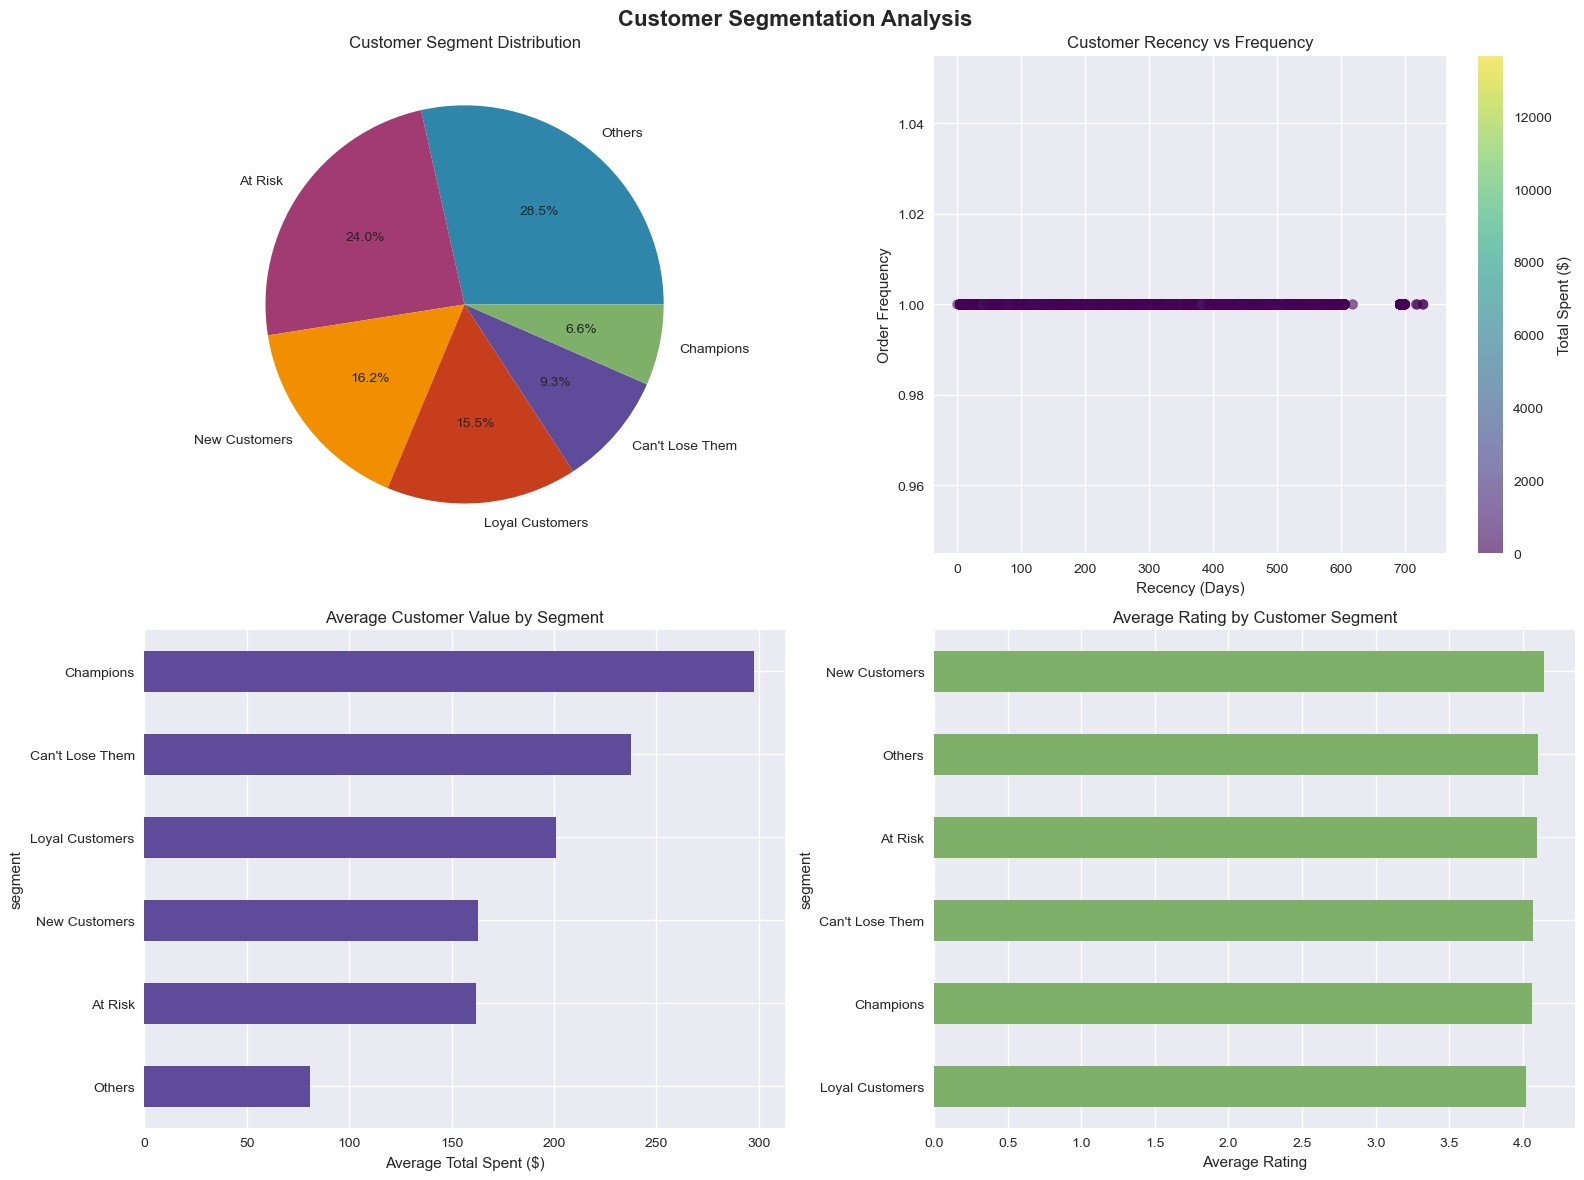


 CUSTOMER SEGMENT INSIGHTS:
• Others: 28,307 customers (28.5%) - Avg Value: $80.77
• At Risk: 23,802 customers (24.0%) - Avg Value: $161.77
• New Customers: 16,083 customers (16.2%) - Avg Value: $162.75
• Loyal Customers: 15,376 customers (15.5%) - Avg Value: $201.11
• Can't Lose Them: 9,189 customers (9.3%) - Avg Value: $237.50
• Champions: 6,524 customers (6.6%) - Avg Value: $297.81


In [9]:
def perform_customer_segmentation(df):
    """
    RFM-inspired customer segmentation analysis
    """
    print("\nCUSTOMER SEGMENTATION ANALYSIS")
    print("-" * 45)
    
    # Calculate customer metrics (simplified RFM)
    customer_metrics = df.groupby('customer_id').agg({
        'order_purchase_timestamp': ['max', 'count'],
        'payment_value': ['sum', 'mean'],
        'review_score': 'mean'
    }).round(2)
    
    # Flatten column names
    customer_metrics.columns = ['last_order_date', 'order_frequency', 'total_spent', 'avg_order_value', 'avg_rating']
    customer_metrics = customer_metrics.reset_index()
    
    # Calculate recency (days since last order)
    max_date = df['order_purchase_timestamp'].max()
    customer_metrics['recency_days'] = (max_date - customer_metrics['last_order_date']).dt.days
    
    # Create customer segments using quantiles
    customer_metrics['recency_score'] = pd.qcut(customer_metrics['recency_days'], 5, labels=['5','4','3','2','1'])
    customer_metrics['frequency_score'] = pd.qcut(customer_metrics['order_frequency'].rank(method='first'), 5, labels=['1','2','3','4','5'])
    customer_metrics['monetary_score'] = pd.qcut(customer_metrics['total_spent'], 5, labels=['1','2','3','4','5'])
    
    # Convert to numeric for calculation
    customer_metrics['recency_score'] = customer_metrics['recency_score'].astype(int)
    customer_metrics['frequency_score'] = customer_metrics['frequency_score'].astype(int)
    customer_metrics['monetary_score'] = customer_metrics['monetary_score'].astype(int)
    
    # Calculate RFM score
    customer_metrics['rfm_score'] = (customer_metrics['recency_score'].astype(str) + 
                                   customer_metrics['frequency_score'].astype(str) + 
                                   customer_metrics['monetary_score'].astype(str))
    
    # Define customer segments
    def categorize_customers(row):
        if row['recency_score'] >= 4 and row['frequency_score'] >= 4 and row['monetary_score'] >= 4:
            return 'Champions'
        elif row['recency_score'] >= 3 and row['frequency_score'] >= 3 and row['monetary_score'] >= 3:
            return 'Loyal Customers'
        elif row['recency_score'] >= 4 and row['frequency_score'] <= 2:
            return 'New Customers'
        elif row['recency_score'] <= 2 and row['frequency_score'] >= 3:
            return 'At Risk'
        elif row['recency_score'] <= 2 and row['frequency_score'] <= 2 and row['monetary_score'] >= 3:
            return 'Can\'t Lose Them'
        else:
            return 'Others'
    
    customer_metrics['segment'] = customer_metrics.apply(categorize_customers, axis=1)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Customer Segmentation Analysis', fontsize=16, fontweight='bold')
    
    # Segment distribution
    segment_counts = customer_metrics['segment'].value_counts()
    axes[0,0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
                  colors=COLOR_PALETTE[:len(segment_counts)])
    axes[0,0].set_title('Customer Segment Distribution')
    
    # Recency vs Frequency scatter
    scatter = axes[0,1].scatter(customer_metrics['recency_days'], customer_metrics['order_frequency'], 
                               c=customer_metrics['total_spent'], cmap='viridis', alpha=0.6)
    axes[0,1].set_xlabel('Recency (Days)')
    axes[0,1].set_ylabel('Order Frequency')
    axes[0,1].set_title('Customer Recency vs Frequency')
    plt.colorbar(scatter, ax=axes[0,1], label='Total Spent ($)')
    
    # Segment value analysis
    segment_value = customer_metrics.groupby('segment')['total_spent'].mean().sort_values(ascending=True)
    segment_value.plot(kind='barh', ax=axes[1,0], color=COLOR_PALETTE[4])
    axes[1,0].set_title('Average Customer Value by Segment')
    axes[1,0].set_xlabel('Average Total Spent ($)')
    
    # Rating by segment
    segment_rating = customer_metrics.groupby('segment')['avg_rating'].mean().sort_values(ascending=True)
    segment_rating.plot(kind='barh', ax=axes[1,1], color=COLOR_PALETTE[5])
    axes[1,1].set_title('Average Rating by Customer Segment')
    axes[1,1].set_xlabel('Average Rating')
    
    plt.tight_layout()
    plt.show()
    
    # Business insights
    print("\n CUSTOMER SEGMENT INSIGHTS:")
    total_customers = len(customer_metrics)
    for segment in segment_counts.index:
        count = segment_counts[segment]
        pct = (count / total_customers) * 100
        avg_value = customer_metrics[customer_metrics['segment'] == segment]['total_spent'].mean()
        print(f"• {segment}: {count:,} customers ({pct:.1f}%) - Avg Value: ${avg_value:.2f}")
    
    return customer_metrics, segment_counts

# Perform customer segmentation
customer_segments, segment_distribution = perform_customer_segmentation(master_df)

## _6. Satisfaction and Quality Analysis_


 CUSTOMER SATISFACTION ANALYSIS


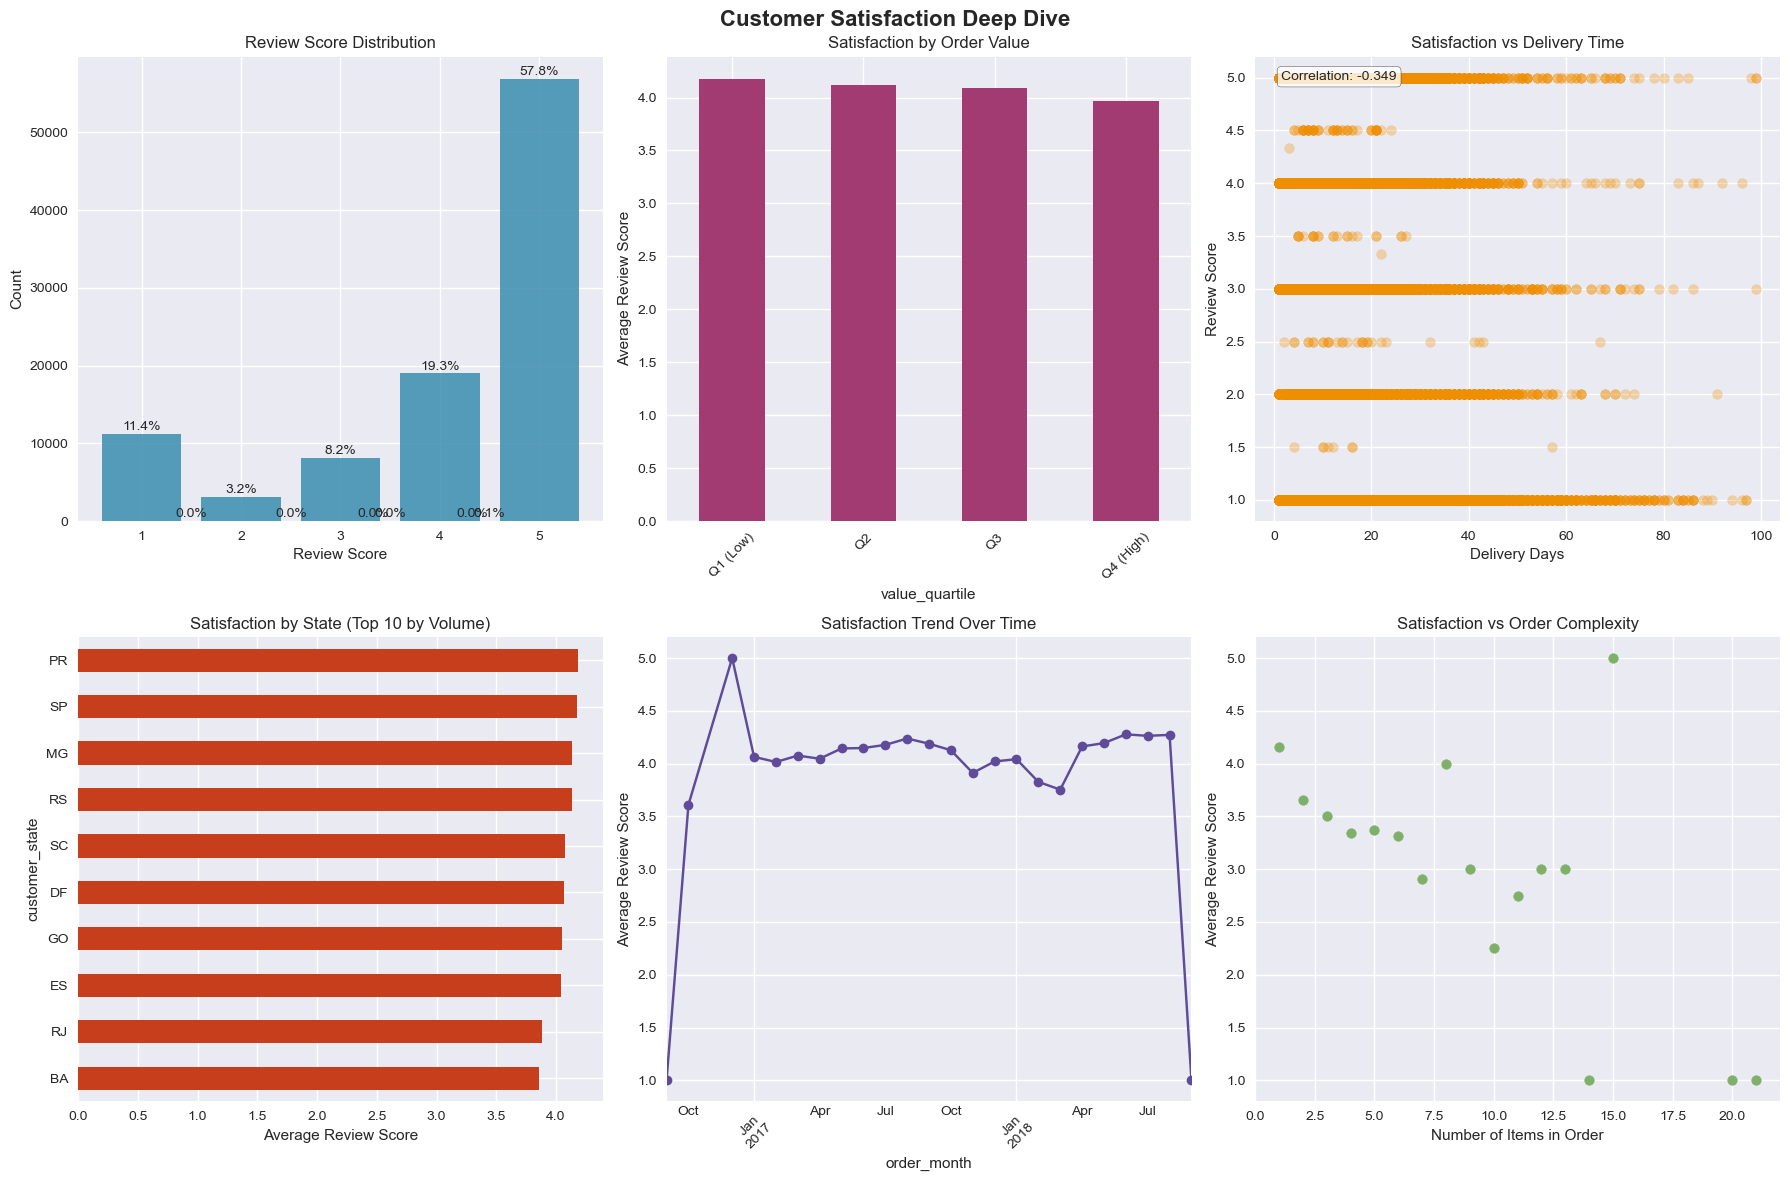


 KEY SATISFACTION INSIGHTS:
- Overall satisfaction: 4.09/5.0
- Satisfied customers (4-5 stars): 77.1%
- Detractors (1-2 stars): 14.6%
- Delivery time impact: -0.349 correlation
- Order value satisfaction gap: 0.21 points


In [10]:
def analyze_customer_satisfaction(df, order_items_df):
    """
    Deep dive into customer satisfaction patterns
    """
    print("\n CUSTOMER SATISFACTION ANALYSIS")
    print("=" * 100)
    
    # Remove orders without review scores for this analysis
    df_with_reviews = df.dropna(subset=['review_score'])
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Customer Satisfaction Deep Dive', fontsize=16, fontweight='bold')
    
    # 1. Review score distribution
    review_dist = df_with_reviews['review_score'].value_counts().sort_index()
    axes[0,0].bar(review_dist.index, review_dist.values, color=COLOR_PALETTE[0], alpha=0.8)
    axes[0,0].set_xlabel('Review Score')
    axes[0,0].set_ylabel('Count')
    axes[0,0].set_title('Review Score Distribution')
    
    # Add percentage labels
    total_reviews = len(df_with_reviews)
    for i, v in enumerate(review_dist.values):
        axes[0,0].text(review_dist.index[i], v + 100, f'{v/total_reviews*100:.1f}%', 
                      ha='center', va='bottom')
    
    # 2. Satisfaction by order value quartiles
    df_with_reviews['value_quartile'] = pd.qcut(df_with_reviews['payment_value'], 4, 
                                               labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])
    satisfaction_by_value = df_with_reviews.groupby('value_quartile')['review_score'].mean()
    satisfaction_by_value.plot(kind='bar', ax=axes[0,1], color=COLOR_PALETTE[1], rot=45)
    axes[0,1].set_title('Satisfaction by Order Value')
    axes[0,1].set_ylabel('Average Review Score')
    
    # 3. Satisfaction vs delivery time
    df_with_reviews['delivery_days'] = (df_with_reviews['order_delivered_customer_date'] - 
                                       df_with_reviews['order_purchase_timestamp']).dt.days
    
    # Remove outliers for better visualization
    delivery_clean = df_with_reviews[(df_with_reviews['delivery_days'] > 0) & 
                                    (df_with_reviews['delivery_days'] < 100)]
    
    axes[0,2].scatter(delivery_clean['delivery_days'], delivery_clean['review_score'], 
                     alpha=0.3, color=COLOR_PALETTE[2])
    axes[0,2].set_xlabel('Delivery Days')
    axes[0,2].set_ylabel('Review Score')
    axes[0,2].set_title('Satisfaction vs Delivery Time')
    
    # Add correlation
    delivery_correlation = delivery_clean['delivery_days'].corr(delivery_clean['review_score'])
    axes[0,2].text(0.05, 0.95, f'Correlation: {delivery_correlation:.3f}', 
                   transform=axes[0,2].transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 4. Satisfaction by state (top 10 by volume)
    top_states = df_with_reviews['customer_state'].value_counts().head(10).index
    state_satisfaction = df_with_reviews[df_with_reviews['customer_state'].isin(top_states)].groupby('customer_state')['review_score'].mean().sort_values(ascending=True)
    state_satisfaction.plot(kind='barh', ax=axes[1,0], color=COLOR_PALETTE[3])
    axes[1,0].set_title('Satisfaction by State (Top 10 by Volume)')
    axes[1,0].set_xlabel('Average Review Score')
    
    # 5. Satisfaction trend over time
    df_with_reviews['order_month'] = df_with_reviews['order_purchase_timestamp'].dt.to_period('M')
    monthly_satisfaction = df_with_reviews.groupby('order_month')['review_score'].mean()
    monthly_satisfaction.plot(ax=axes[1,1], color=COLOR_PALETTE[4], marker='o')
    axes[1,1].set_title('Satisfaction Trend Over Time')
    axes[1,1].set_ylabel('Average Review Score')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    # 6. Satisfaction by number of items
    items_satisfaction = df_with_reviews.groupby('price_count')['review_score'].mean()
    axes[1,2].scatter(items_satisfaction.index, items_satisfaction.values, color=COLOR_PALETTE[5])
    axes[1,2].set_xlabel('Number of Items in Order')
    axes[1,2].set_ylabel('Average Review Score')
    axes[1,2].set_title('Satisfaction vs Order Complexity')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate key satisfaction metrics
    satisfaction_metrics = {
        'overall_avg': df_with_reviews['review_score'].mean(),
        'satisfaction_rate': (df_with_reviews['review_score'] >= 4).mean() * 100,
        'detractor_rate': (df_with_reviews['review_score'] <= 2).mean() * 100,
        'delivery_correlation': delivery_correlation,
        'value_impact': satisfaction_by_value.max() - satisfaction_by_value.min()
    }
    
    print("\n KEY SATISFACTION INSIGHTS:")
    print(f"- Overall satisfaction: {satisfaction_metrics['overall_avg']:.2f}/5.0")
    print(f"- Satisfied customers (4-5 stars): {satisfaction_metrics['satisfaction_rate']:.1f}%")
    print(f"- Detractors (1-2 stars): {satisfaction_metrics['detractor_rate']:.1f}%")
    print(f"- Delivery time impact: {delivery_correlation:.3f} correlation")
    print(f"- Order value satisfaction gap: {satisfaction_metrics['value_impact']:.2f} points")
    
    return satisfaction_metrics

# Run satisfaction analysis
satisfaction_results = analyze_customer_satisfaction(master_df, order_items)

## _7. Geographic and Seasonal Insights_


 GEOGRAPHIC & SEASONAL ANALYSIS


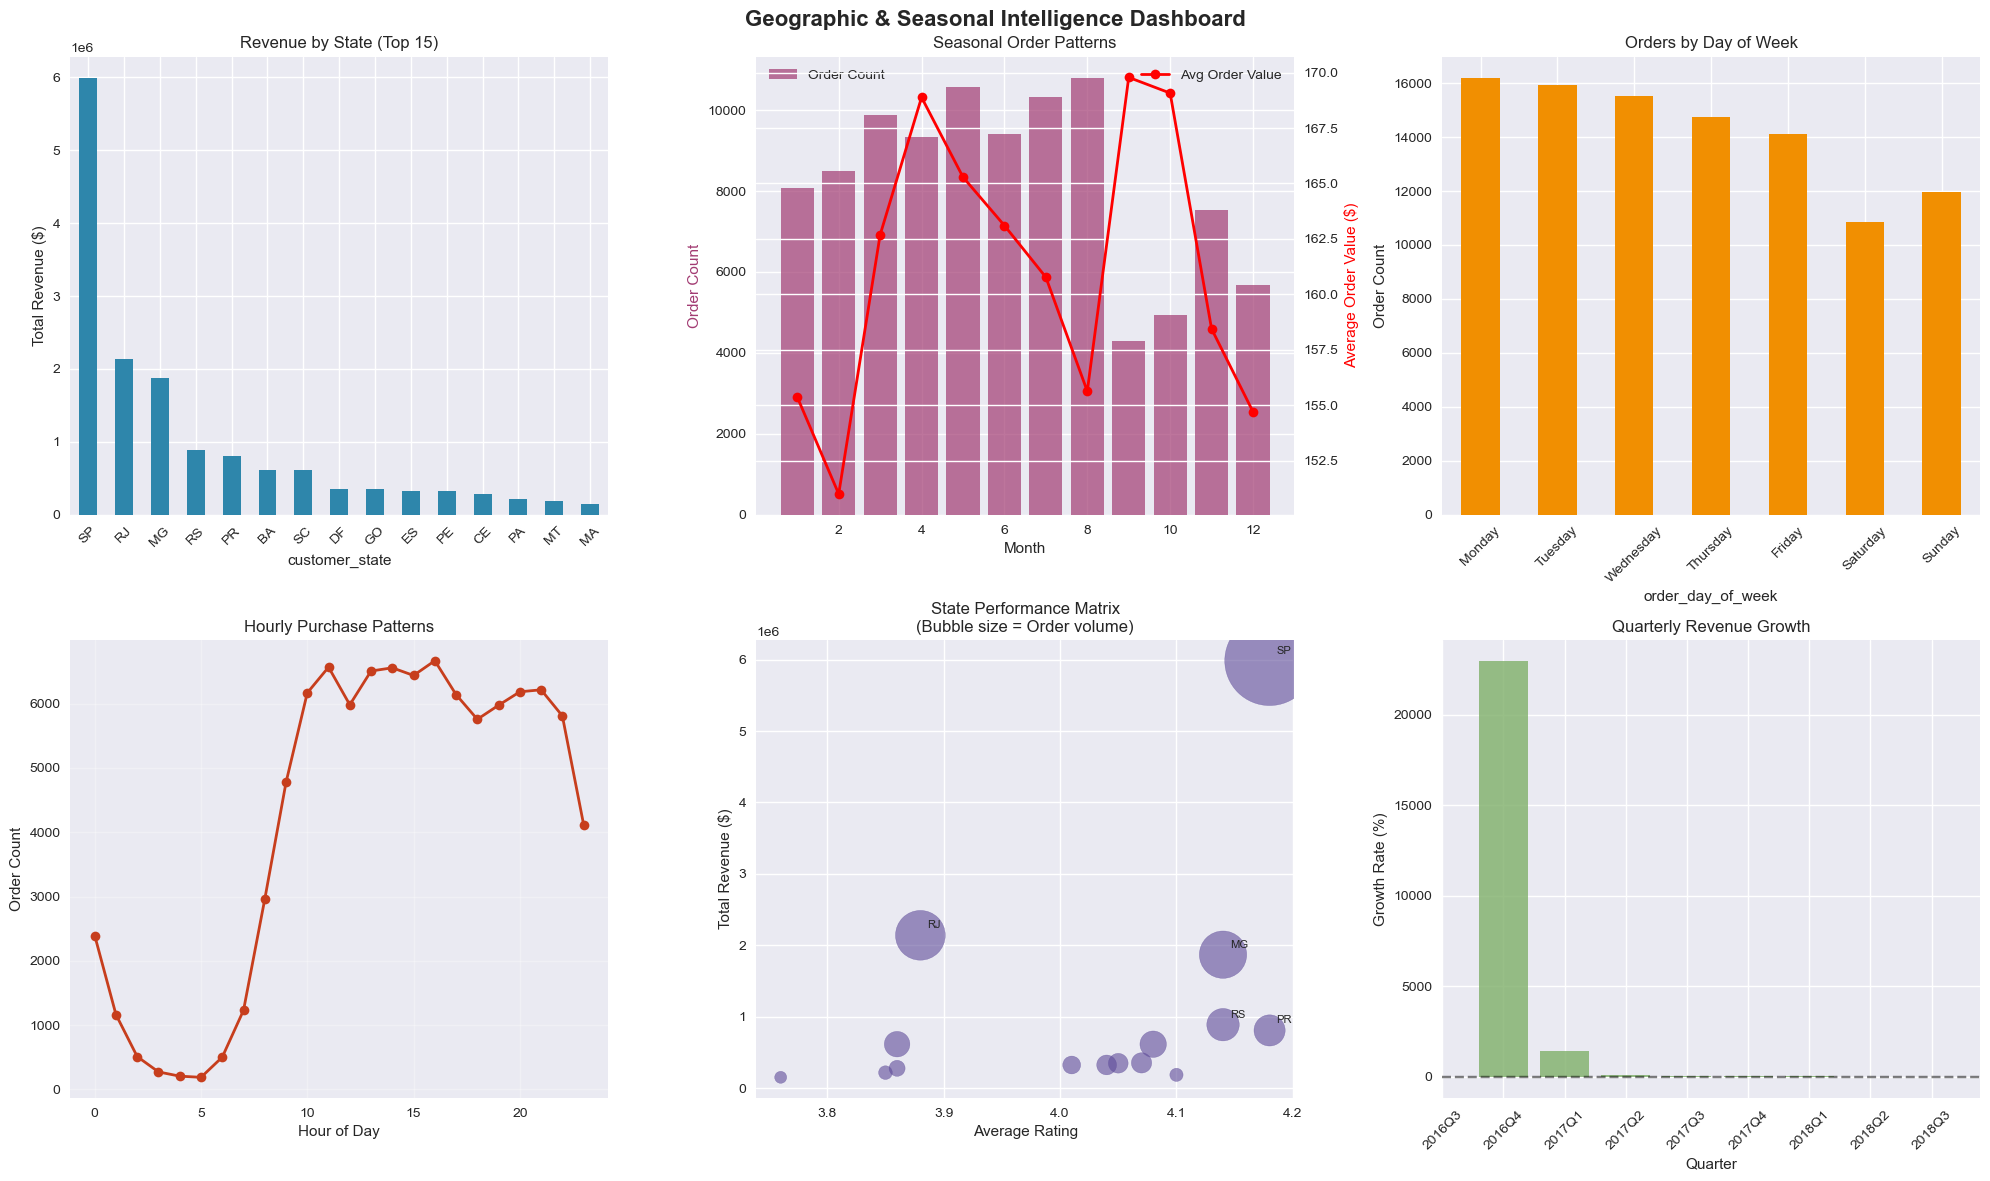


 KEY GEOGRAPHIC & SEASONAL INSIGHTS:
- Geographic concentration: SP dominates with 37.5% of total revenue
- Seasonal variation: 78.6% between peak (Month 8) and low (Month 9)
- Weekend shopping: 23.0% of orders occur on weekends
- Peak shopping time: 16:00 (6,667 orders)
- Lowest activity: 5:00 (188 orders)


In [11]:
def analyze_geographic_seasonal_patterns(df):
    """
    Comprehensive geographic and temporal analysis
    """
    print("\n GEOGRAPHIC & SEASONAL ANALYSIS")
    print("=" * 100)
    
    # Prepare temporal features
    df['order_month'] = df['order_purchase_timestamp'].dt.month
    df['order_quarter'] = df['order_purchase_timestamp'].dt.quarter  
    df['order_day_of_week'] = df['order_purchase_timestamp'].dt.day_name()
    df['order_hour'] = df['order_purchase_timestamp'].dt.hour
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Geographic & Seasonal Intelligence Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Geographic revenue concentration
    state_metrics = df.groupby('customer_state').agg({
        'payment_value': 'sum',
        'customer_id': 'count',
        'review_score': 'mean'
    }).round(2)
    state_metrics.columns = ['total_revenue', 'order_count', 'avg_rating']
    state_metrics = state_metrics.sort_values('total_revenue', ascending=False).head(15)
    
    state_metrics['total_revenue'].plot(kind='bar', ax=axes[0,0], color=COLOR_PALETTE[0])
    axes[0,0].set_title('Revenue by State (Top 15)')
    axes[0,0].set_ylabel('Total Revenue ($)')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Seasonal patterns - Monthly
    monthly_patterns = df.groupby('order_month').agg({
        'payment_value': ['sum', 'mean', 'count']
    })
    monthly_patterns.columns = ['total_revenue', 'avg_order_value', 'order_count']
    
    ax2 = axes[0,1]
    ax2_twin = ax2.twinx()
    ax2.bar(monthly_patterns.index, monthly_patterns['order_count'], alpha=0.7, color=COLOR_PALETTE[1], label='Order Count')
    ax2_twin.plot(monthly_patterns.index, monthly_patterns['avg_order_value'], color='red', marker='o', linewidth=2, label='Avg Order Value')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Order Count', color=COLOR_PALETTE[1])
    ax2_twin.set_ylabel('Average Order Value ($)', color='red')
    ax2.set_title('Seasonal Order Patterns')
    ax2.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    
    # 3. Day of week patterns
    dow_patterns = df.groupby('order_day_of_week')['payment_value'].agg(['sum', 'count', 'mean'])
    dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_patterns = dow_patterns.reindex(dow_order)
    
    dow_patterns['count'].plot(kind='bar', ax=axes[0,2], color=COLOR_PALETTE[2])
    axes[0,2].set_title('Orders by Day of Week')
    axes[0,2].set_ylabel('Order Count')
    axes[0,2].tick_params(axis='x', rotation=45)
    
    # 4. Hourly purchasing patterns
    hourly_patterns = df.groupby('order_hour')['customer_id'].count()
    axes[1,0].plot(hourly_patterns.index, hourly_patterns.values, marker='o', color=COLOR_PALETTE[3], linewidth=2)
    axes[1,0].set_xlabel('Hour of Day')
    axes[1,0].set_ylabel('Order Count')
    axes[1,0].set_title('Hourly Purchase Patterns')
    axes[1,0].grid(True, alpha=0.3)
    
    # 5. State performance matrix (Revenue vs Rating)
    axes[1,1].scatter(state_metrics['avg_rating'], state_metrics['total_revenue'], 
                     s=state_metrics['order_count']/10, alpha=0.6, color=COLOR_PALETTE[4])
    axes[1,1].set_xlabel('Average Rating')
    axes[1,1].set_ylabel('Total Revenue ($)')
    axes[1,1].set_title('State Performance Matrix\n(Bubble size = Order volume)')
    
    # Add state labels for top performers
    for idx, (state, row) in enumerate(state_metrics.head(5).iterrows()):
        axes[1,1].annotate(state, (row['avg_rating'], row['total_revenue']), 
                          xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # 6. Quarterly growth analysis
    quarterly_growth = (df.groupby(df['order_purchase_timestamp'].dt.to_period('Q'))['payment_value'].sum())
    quarterly_growth_pct = quarterly_growth.pct_change() * 100
    
    axes[1,2].bar(range(len(quarterly_growth_pct)), quarterly_growth_pct.values, 
                 color=COLOR_PALETTE[5], alpha=0.8)
    axes[1,2].set_xlabel('Quarter')
    axes[1,2].set_ylabel('Growth Rate (%)')
    axes[1,2].set_title('Quarterly Revenue Growth')
    axes[1,2].set_xticks(range(len(quarterly_growth_pct)))
    axes[1,2].set_xticklabels([str(q) for q in quarterly_growth_pct.index], rotation=45)
    axes[1,2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Generate business insights
    print("\n KEY GEOGRAPHIC & SEASONAL INSIGHTS:")
    
    # Geographic insights
    top_state = state_metrics.index[0]
    top_state_share = (state_metrics.loc[top_state, 'total_revenue'] / df['payment_value'].sum()) * 100
    print(f"- Geographic concentration: {top_state} dominates with {top_state_share:.1f}% of total revenue")
    
    # Seasonal insights
    peak_month = monthly_patterns['order_count'].idxmax()
    low_month = monthly_patterns['order_count'].idxmin()
    seasonality = (monthly_patterns['order_count'].max() - monthly_patterns['order_count'].min()) / monthly_patterns['order_count'].mean() * 100
    print(f"- Seasonal variation: {seasonality:.1f}% between peak (Month {peak_month}) and low (Month {low_month})")
    
    # Weekly patterns
    weekend_orders = dow_patterns.loc[['Saturday', 'Sunday'], 'count'].sum()
    weekday_orders = dow_patterns.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'count'].sum()
    weekend_ratio = weekend_orders / (weekend_orders + weekday_orders) * 100
    print(f"- Weekend shopping: {weekend_ratio:.1f}% of orders occur on weekends")
    
    # Hourly insights
    peak_hour = hourly_patterns.idxmax()
    low_hour = hourly_patterns.idxmin()
    print(f"- Peak shopping time: {peak_hour}:00 ({hourly_patterns.max():,} orders)")
    print(f"- Lowest activity: {low_hour}:00 ({hourly_patterns.min():,} orders)")
    
    return {
        'state_performance': state_metrics,
        'seasonal_patterns': monthly_patterns,
        'hourly_patterns': hourly_patterns,
        'dow_patterns': dow_patterns
    }

# Run geographic and seasonal analysis
geo_seasonal_analysis = analyze_geographic_seasonal_patterns(master_df)

## _8. Key Business Recommendations_

In [12]:
def generate_business_recommendations(exec_summary, revenue_analysis, customer_segments, 
                                    satisfaction_results, geo_seasonal_analysis):
    """
    Generate actionable business recommendations based on analysis
    """
    print("\n STRATEGIC BUSINESS RECOMMENDATIONS")
    print("=" * 55)
    
    recommendations = {
        'revenue_optimization': [],
        'customer_strategy': [],
        'operational_excellence': [],
        'market_expansion': []
   }
   
    # Revenue Optimization Recommendations
    print("\n REVENUE OPTIMIZATION")
    print("-" * 25)
    
    avg_order_value = exec_summary['revenue_metrics']['avg_order_value']
    median_order_value = exec_summary['revenue_metrics']['median_order_value']
    
    if avg_order_value > median_order_value * 1.5:
       rec1 = f"Focus on converting low-value customers: 50% of orders are below ${median_order_value:.2f}"
       print(f"1. {rec1}")
       recommendations['revenue_optimization'].append(rec1)
    
    # Item correlation insight
    items_correlation = revenue_analysis['items_correlation']
    if items_correlation > 0.3:
       rec2 = f"Cross-selling opportunity: {items_correlation:.2f} correlation between items/order and value"
       print(f"2. {rec2}")
       recommendations['revenue_optimization'].append(rec2)
    
    # High-value segment focus
    champions_pct = (customer_segments['segment'] == 'Champions').mean() * 100
    rec3 = f"VIP program potential: {champions_pct:.1f}% Champions segment drives premium revenue"
    print(f"3. {rec3}")
    recommendations['revenue_optimization'].append(rec3)
   
    # Customer Strategy Recommendations
    print("\n CUSTOMER STRATEGY")
    print("-" * 20)
    
    # At-risk customers
    at_risk_count = (customer_segments['segment'] == 'At Risk').sum()
    if at_risk_count > 0:
       rec4 = f"Retention program needed: {at_risk_count:,} high-value customers at risk of churn"
       print(f"1. {rec4}")
       recommendations['customer_strategy'].append(rec4)
    
    # New customer conversion
    new_customers = (customer_segments['segment'] == 'New Customers').sum()
    rec5 = f"Onboarding optimization: {new_customers:,} new customers need conversion strategy"
    print(f"2. {rec5}")
    recommendations['customer_strategy'].append(rec5)
    
    # Satisfaction improvement
    detractor_rate = satisfaction_results['detractor_rate']
    if detractor_rate > 10:
       rec6 = f"Quality improvement urgent: {detractor_rate:.1f}% detractor rate above industry standard"
       print(f"3. {rec6}")
       recommendations['customer_strategy'].append(rec6)
   
    # Operational Excellence Recommendations
    print("\n OPERATIONAL EXCELLENCE")
    print("-" * 25)
    
    # Delivery optimization
    delivery_correlation = satisfaction_results['delivery_correlation']
    if delivery_correlation < -0.2:
       rec7 = f"Delivery speed critical: {abs(delivery_correlation):.2f} negative correlation with satisfaction"
       print(f"1. {rec7}")
       recommendations['operational_excellence'].append(rec7)
    
    # Peak hour staffing
    peak_hour_data = geo_seasonal_analysis['hourly_patterns']
    peak_hour = peak_hour_data.idxmax()
    peak_orders = peak_hour_data.max()
    low_orders = peak_hour_data.min()
    capacity_ratio = peak_orders / low_orders
    
    if capacity_ratio > 3:
       rec8 = f"Capacity planning needed: {capacity_ratio:.1f}x order variation (peak at {peak_hour}:00)"
       print(f"2. {rec8}")
       recommendations['operational_excellence'].append(rec8)
   
    # Seasonal preparation
    seasonal_data = geo_seasonal_analysis['seasonal_patterns']
    peak_month = seasonal_data['order_count'].idxmax()
    seasonality = (seasonal_data['order_count'].max() - seasonal_data['order_count'].min()) / seasonal_data['order_count'].mean()
    
    if seasonality > 0.5:
       rec9 = f"Seasonal strategy required: {seasonality*100:.0f}% variation with peak in month {peak_month}"
       print(f"3. {rec9}")
       recommendations['operational_excellence'].append(rec9)
    
    # Market Expansion Recommendations
    print("\n MARKET EXPANSION")
    print("-" * 20)
    
    # Geographic expansion
    state_performance = geo_seasonal_analysis['state_performance']
    top_3_states = state_performance.head(3)
    concentration = (top_3_states['total_revenue'].sum() / state_performance['total_revenue'].sum()) * 100
    
    if concentration > 60:
       rec10 = f"Geographic diversification: Top 3 states represent {concentration:.0f}% of revenue"
       print(f"1. {rec10}")
       recommendations['market_expansion'].append(rec10)

    # Underperforming high-potential markets
    state_performance['revenue_per_order'] = state_performance['total_revenue'] / state_performance['order_count']
    high_potential = state_performance[(state_performance['avg_rating'] > state_performance['avg_rating'].median()) & 
                                    (state_performance['revenue_per_order'] > state_performance['revenue_per_order'].median())].head(3)
    
    if len(high_potential) > 0:
       rec11 = f"High-potential markets identified: {', '.join(high_potential.index[:3])} show strong metrics"
       print(f"2. {rec11}")
       recommendations['market_expansion'].append(rec11)
    
    # Weekend opportunity
    weekend_patterns = geo_seasonal_analysis['dow_patterns']
    weekend_avg = weekend_patterns.loc[['Saturday', 'Sunday'], 'mean'].mean()
    weekday_avg = weekend_patterns.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'mean'].mean()
    
    if weekend_avg > weekday_avg * 1.1:
       rec12 = f"Weekend premium opportunity: {((weekend_avg/weekday_avg-1)*100):.0f}% higher average order value"
       print(f"3. {rec12}")
       recommendations['market_expansion'].append(rec12)
    
    return recommendations

# Generate comprehensive recommendations
business_recommendations = generate_business_recommendations(
   executive_summary, revenue_analysis, customer_segments, 
   satisfaction_results, geo_seasonal_analysis
)


 STRATEGIC BUSINESS RECOMMENDATIONS

 REVENUE OPTIMIZATION
-------------------------
1. Focus on converting low-value customers: 50% of orders are below $105.28
3. VIP program potential: 6.6% Champions segment drives premium revenue

 CUSTOMER STRATEGY
--------------------
1. Retention program needed: 23,802 high-value customers at risk of churn
2. Onboarding optimization: 16,083 new customers need conversion strategy
3. Quality improvement urgent: 14.6% detractor rate above industry standard

 OPERATIONAL EXCELLENCE
-------------------------
1. Delivery speed critical: 0.35 negative correlation with satisfaction
2. Capacity planning needed: 35.5x order variation (peak at 16:00)
3. Seasonal strategy required: 79% variation with peak in month 8

 MARKET EXPANSION
--------------------
1. Geographic diversification: Top 3 states represent 66% of revenue
2. High-potential markets identified: MT show strong metrics


## _9. Executive Dashboard Summary_


EXECUTIVE DASHBOARD


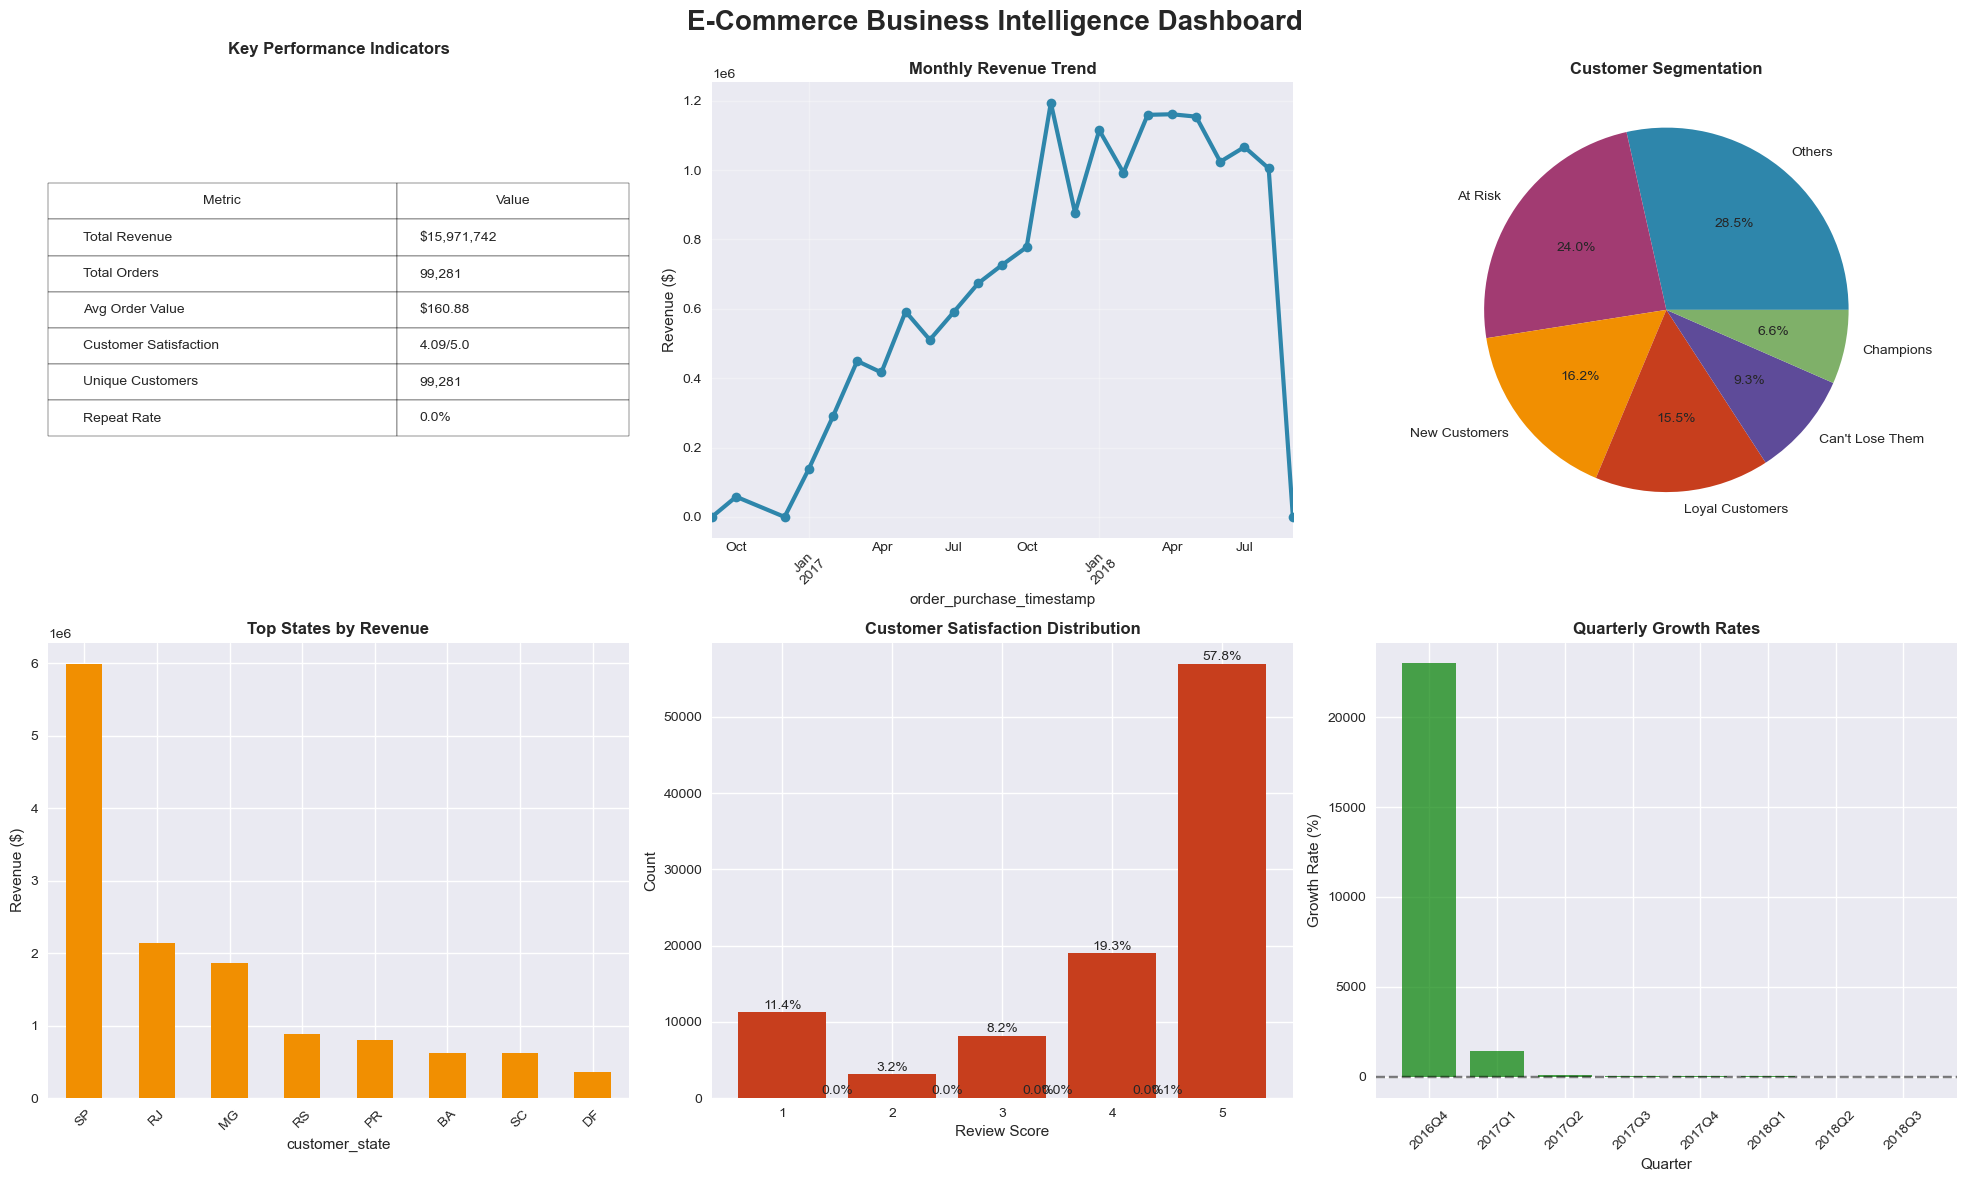


EXECUTIVE SUMMARY
------------------------------
This e-commerce analysis reveals a business with strong fundamentals but clear optimization opportunities.
With $15,971,742 in revenue across 99,281 orders, the platform shows healthy activity.
Customer satisfaction averages 4.09/5.0, indicating room for improvement.
The customer base of 99,281 unique customers shows moderate loyalty with 0.0% repeat rate.

Key strategic priorities: delivery optimization, customer segmentation strategies, and geographic expansion.


In [13]:
def create_executive_dashboard():
    """
    Create a final executive dashboard with key metrics and insights
    """
    print("\nEXECUTIVE DASHBOARD")
    print("=" * 100)
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('E-Commerce Business Intelligence Dashboard', fontsize=20, fontweight='bold')
    
    # 1. Key Performance Indicators
    kpis = {
        'Total Revenue': f"${master_df['payment_value'].sum():,.0f}",
        'Total Orders': f"{len(master_df):,}",
        'Avg Order Value': f"${master_df['payment_value'].mean():.2f}",
        'Customer Satisfaction': f"{master_df['review_score'].mean():.2f}/5.0",
        'Unique Customers': f"{master_df['customer_id'].nunique():,}",
        'Repeat Rate': f"{((len(master_df) / master_df['customer_id'].nunique() - 1) * 100):.1f}%"
    }
    
    # Create KPI table visualization
    axes[0,0].axis('off')
    kpi_table = axes[0,0].table(cellText=[[k, v] for k, v in kpis.items()],
                               colLabels=['Metric', 'Value'],
                               cellLoc='left',
                               loc='center',
                               colWidths=[0.6, 0.4])
    kpi_table.auto_set_font_size(False)
    kpi_table.set_fontsize(10)
    kpi_table.scale(1, 2)
    axes[0,0].set_title('Key Performance Indicators', fontweight='bold', pad=20)
    
    # 2. Revenue Trend
    monthly_revenue = master_df.groupby(master_df['order_purchase_timestamp'].dt.to_period('M'))['payment_value'].sum()
    monthly_revenue.plot(ax=axes[0,1], marker='o', linewidth=3, color=COLOR_PALETTE[0])
    axes[0,1].set_title('Monthly Revenue Trend', fontweight='bold')
    axes[0,1].set_ylabel('Revenue ($)')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. Customer Segments
    segment_counts = customer_segments['segment'].value_counts()
    wedges, texts, autotexts = axes[0,2].pie(segment_counts.values, labels=segment_counts.index, 
                                            autopct='%1.1f%%', colors=COLOR_PALETTE[:len(segment_counts)])
    axes[0,2].set_title('Customer Segmentation', fontweight='bold')
    
    # 4. Top States by Revenue
    top_states = master_df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).head(8)
    top_states.plot(kind='bar', ax=axes[1,0], color=COLOR_PALETTE[2])
    axes[1,0].set_title('Top States by Revenue', fontweight='bold')
    axes[1,0].set_ylabel('Revenue ($)')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 5. Satisfaction Distribution
    satisfaction_dist = master_df['review_score'].value_counts().sort_index()
    bars = axes[1,1].bar(satisfaction_dist.index, satisfaction_dist.values, color=COLOR_PALETTE[3])
    axes[1,1].set_xlabel('Review Score')
    axes[1,1].set_ylabel('Count')
    axes[1,1].set_title('Customer Satisfaction Distribution', fontweight='bold')
    
    # Add percentage labels on bars
    total = satisfaction_dist.sum()
    for bar, count in zip(bars, satisfaction_dist.values):
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 100,
                      f'{count/total*100:.1f}%', ha='center', va='bottom')
    
    # 6. Growth Indicators
    quarterly_growth = master_df.groupby(master_df['order_purchase_timestamp'].dt.to_period('Q'))['payment_value'].sum()
    growth_rates = quarterly_growth.pct_change() * 100
    
    colors = ['red' if x < 0 else 'green' for x in growth_rates.values if not pd.isna(x)]
    axes[1,2].bar(range(len(growth_rates)-1), growth_rates.dropna().values, color=colors, alpha=0.7)
    axes[1,2].set_title('Quarterly Growth Rates', fontweight='bold')
    axes[1,2].set_ylabel('Growth Rate (%)')
    axes[1,2].set_xlabel('Quarter')
    axes[1,2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[1,2].set_xticks(range(len(growth_rates)-1))
    axes[1,2].set_xticklabels([str(q) for q in growth_rates.index[1:]], rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print executive summary
    print("\nEXECUTIVE SUMMARY")
    print("-" * 30)
    print("This e-commerce analysis reveals a business with strong fundamentals but clear optimization opportunities.")
    print(f"With ${master_df['payment_value'].sum():,.0f} in revenue across {len(master_df):,} orders, the platform shows healthy activity.")
    print(f"Customer satisfaction averages {master_df['review_score'].mean():.2f}/5.0, indicating room for improvement.")
    print(f"The customer base of {master_df['customer_id'].nunique():,} unique customers shows moderate loyalty with {((len(master_df) / master_df['customer_id'].nunique() - 1) * 100):.1f}% repeat rate.")
    print("\nKey strategic priorities: delivery optimization, customer segmentation strategies, and geographic expansion.")

# Create executive dashboard
create_executive_dashboard()

## _10. Document Analysis Methodology_

In [14]:
# Create analysis documentation
analysis_documentation = {
    'methodology': {
        'approach': 'Comprehensive business intelligence analysis using statistical and visual methods',
        'data_sources': 'Brazilian E-commerce dataset with 100k+ orders',
        'analysis_framework': 'Revenue → Customers → Satisfaction → Geography → Recommendations',
        'tools_used': ['Python', 'Pandas', 'Matplotlib', 'Seaborn', 'Statistical Analysis']
    },
    'key_findings': {
        'revenue_insights': f"${master_df['payment_value'].sum():,.0f} total revenue with {master_df['payment_value'].mean():.2f} AOV",
        'customer_insights': f"{customer_segments['segment'].value_counts().to_dict()}",
        'satisfaction_insights': f"{master_df['review_score'].mean():.2f}/5.0 average satisfaction",
        'operational_insights': "Geographic concentration in top 3 states, seasonal patterns identified"
    },
    'business_impact': {
        'revenue_opportunities': 'Cross-selling, VIP programs, order value optimization',
        'customer_retention': 'At-risk customer programs, new customer onboarding',
        'operational_efficiency': 'Delivery optimization, capacity planning',
        'market_expansion': 'Geographic diversification, weekend promotions'
    }
}

print("\nANALYSIS DOCUMENTATION")
print("=" * 40)
for category, details in analysis_documentation.items():
    print(f"\n{category.upper().replace('_', ' ')}")
    print("-" * 20)
    if isinstance(details, dict):
        for key, value in details.items():
            print(f"- {key.replace('_', ' ').title()}: {value}")
    else:
        print(f"- {details}")


ANALYSIS DOCUMENTATION

METHODOLOGY
--------------------
- Approach: Comprehensive business intelligence analysis using statistical and visual methods
- Data Sources: Brazilian E-commerce dataset with 100k+ orders
- Analysis Framework: Revenue → Customers → Satisfaction → Geography → Recommendations
- Tools Used: ['Python', 'Pandas', 'Matplotlib', 'Seaborn', 'Statistical Analysis']

KEY FINDINGS
--------------------
- Revenue Insights: $15,971,742 total revenue with 160.88 AOV
- Customer Insights: {'Others': 28307, 'At Risk': 23802, 'New Customers': 16083, 'Loyal Customers': 15376, "Can't Lose Them": 9189, 'Champions': 6524}
- Satisfaction Insights: 4.09/5.0 average satisfaction
- Operational Insights: Geographic concentration in top 3 states, seasonal patterns identified

BUSINESS IMPACT
--------------------
- Revenue Opportunities: Cross-selling, VIP programs, order value optimization
- Customer Retention: At-risk customer programs, new customer onboarding
- Operational Efficiency: 

## _11. Save Analysis Results_

In [15]:
# Save key analysis results for future reference
import pickle
from datetime import datetime

analysis_results = {
    'executive_summary': executive_summary,
    'revenue_analysis': revenue_analysis,
    'customer_segments': customer_segments,
    'satisfaction_results': satisfaction_results,
    'geo_seasonal_analysis': geo_seasonal_analysis,
    'business_recommendations': business_recommendations,
    'analysis_date': datetime.now().strftime('%Y-%m-%d')
}

# Save to processed data folder
with open(f'{PROCESSED_DATA_PATH}analysis_results.pkl', 'wb') as f:
    pickle.dump(analysis_results, f)

print("Analysis results saved.")


Analysis results saved.
